# Модель для прогноза «Модуль упругости при растяжении, Гпа» и «Прочность при растяжении, МПа» («MUR» и «PR»)

Предобработка

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt

In [2]:
#директория проекта
diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#шкалируем на [0,1]
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
#df.describe().T

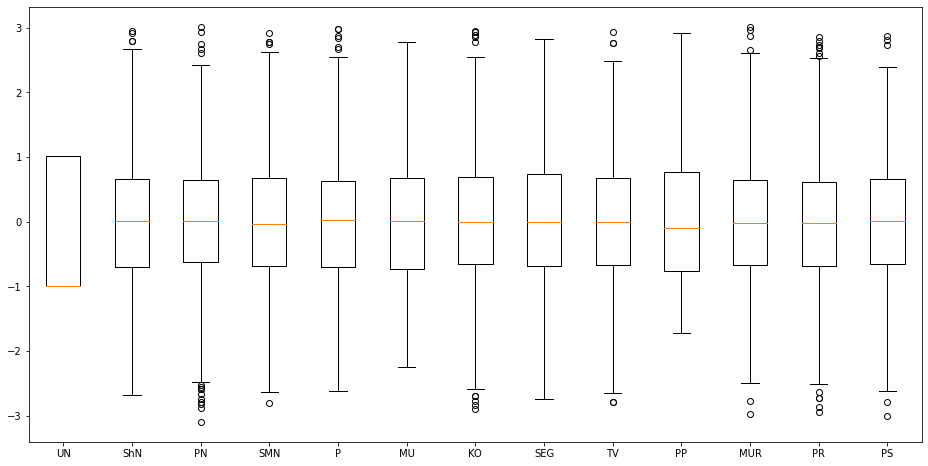

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',])) #входы
y = np.array(df.drop(columns=['UN','ShN','PN','SMN','P','MU','KO','SEG','TV','PP','PS'])) #выходы

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 2), (300, 2))

Модель

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(y_train.shape[1], activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 31,602
Trainable params: 31,602
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='mae',metrics=['mae','mse'])

In [10]:
model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
56/56 [==============================] - 1s 8ms/step - loss: 0.8155 - mae: 0.8155 - mse: 1.0546 - val_loss: 0.8235 - val_mae: 0.8235 - val_mse: 1.0391
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.8059 - mae: 0.8059 - mse: 1.0267 - val_loss: 0.8247 - val_mae: 0.8247 - val_mse: 1.0417
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.8095 - mae: 0.8095 - mse: 1.0269 - val_loss: 0.8184 - val_mae: 0.8184 - val_mse: 1.0582
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.8078 - mae: 0.8078 - mse: 1.0189 - val_loss: 0.8168 - val_mae: 0.8168 - val_mse: 1.0463
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.8063 - mae: 0.8063 - mse: 1.0189 - val_loss: 0.8274 - val_mae: 0.8274 - val_mse: 1.0810
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.8003 - mae: 0.8003 - mse: 1.0150 - val_loss: 0.8370 - val_mae: 0.8370 - val_mse: 1.0742
Epoch 7/100
56/56 [===

56/56 [==============================] - 0s 4ms/step - loss: 0.7863 - mae: 0.7863 - mse: 0.9811 - val_loss: 0.8193 - val_mae: 0.8193 - val_mse: 1.0404
Epoch 52/100
56/56 [==============================] - 0s 4ms/step - loss: 0.7845 - mae: 0.7845 - mse: 0.9784 - val_loss: 0.8203 - val_mae: 0.8203 - val_mse: 1.0335
Epoch 53/100
56/56 [==============================] - 0s 3ms/step - loss: 0.7851 - mae: 0.7851 - mse: 0.9785 - val_loss: 0.8198 - val_mae: 0.8198 - val_mse: 1.0298
Epoch 54/100
56/56 [==============================] - 0s 4ms/step - loss: 0.7885 - mae: 0.7885 - mse: 0.9845 - val_loss: 0.8234 - val_mae: 0.8234 - val_mse: 1.0398
Epoch 55/100
56/56 [==============================] - 0s 4ms/step - loss: 0.7854 - mae: 0.7854 - mse: 0.9804 - val_loss: 0.8279 - val_mae: 0.8279 - val_mse: 1.0586
Epoch 56/100
56/56 [==============================] - 0s 3ms/step - loss: 0.7849 - mae: 0.7849 - mse: 0.9828 - val_loss: 0.8194 - val_mae: 0.8194 - val_mse: 1.0499
Epoch 57/100
56/56 [=========

In [11]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.7978 - mae: 0.7978 - mse: 1.0315


[0.7978096604347229, 0.7978096604347229, 1.0314947366714478]

In [12]:
result = model.predict(x_test)
#for i in range(len(y_test)): 
#    print(y_test[i], result[i])

In [13]:
df_y_test = pd.DataFrame(y_test)
df_result = pd.DataFrame(result)

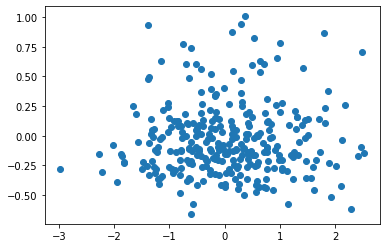

In [14]:
plt.scatter(df_y_test[0], df_result[0])

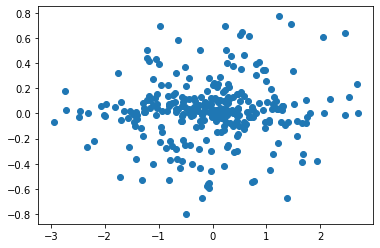

In [15]:
plt.scatter(df_y_test[1], df_result[1])